In [2]:
import pandas as pd
from sklearn import preprocessing

In [3]:
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
url = "https://raw.githubusercontent.com/denisaflorence/predtest/main/labeled_science.csv"
df = pd.read_csv(url)
# df.head(n=10)

In [5]:
del df["Unnamed: 0"]
del df["Result of Acceptance"]
del df["Tally of Acceptance"]

In [6]:
a = pd.DataFrame([df.groupby(['Major ID'])['Major ID'].count()], index=["jumlah_daftar"]).T
b = pd.DataFrame([df.groupby(['Major ID'])['Capacity'].max()], index=["kapasitas"]).T

In [7]:
ha = pd.concat([a, b], axis=1)
ha = ha.reset_index()
ha.head()

,Major ID,jumlah_daftar,kapasitas
0,1111014,66,88
1,1111022,63,64
2,1111037,21,48
3,1111045,26,48
4,1111053,33,48


In [8]:
df = df.set_index("Major ID")

In [9]:
df = df.join(a)

In [10]:
df = df.sort_values(by=["Major ID", "Avg Score Student Science"])
df = df.reset_index()
df

,Major ID,User ID,Biology,Physics,Chemistry,Reading Comprehension & Writing for Science,General Reasoning for Science,Quantitative Skills for Science,Mathematics,General Knowledge & Understanding for Science,Avg Potency Test Science,Avg Score Student Science,Departement,Major Name,Capacity,University,jumlah_daftar
0,1111014,228456,411,349,350,442,468,276,458,565,437.75,414.88,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66
1,1111014,210907,483,461,342,461,410,443,570,445,439.75,451.88,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66
2,1111014,336420,394,500,485,476,440,414,525,451,445.25,460.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66
3,1111014,219317,425,405,417,433,467,466,573,521,471.75,463.38,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66
4,1111014,134575,370,534,468,479,453,559,465,429,480.00,469.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86564,9211352,43721,536,388,573,554,514,653,371,478,549.75,508.38,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9
86565,9211352,284260,563,483,453,520,545,544,518,523,533.00,518.62,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9
86566,9211352,314505,539,634,663,441,513,597,425,426,494.25,529.75,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9
86567,9211352,58711,631,616,622,418,479,654,511,552,525.75,560.38,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9


#### Nyoba MinMax Scaler

In [11]:
# Masukin rank
coba_aa = []
for i in ha["Major ID"]:
    for a in reversed(range(len(df[df["Major ID"] == i]))):
        coba_aa.append(a+1)

cobanya = pd.DataFrame(coba_aa, columns=["rank"])
df["rank"] = cobanya
df.head(100)

,Major ID,User ID,Biology,Physics,Chemistry,Reading Comprehension & Writing for Science,General Reasoning for Science,Quantitative Skills for Science,Mathematics,General Knowledge & Understanding for Science,Avg Potency Test Science,Avg Score Student Science,Departement,Major Name,Capacity,University,jumlah_daftar,rank
0,1111014,228456,411,349,350,442,468,276,458,565,437.75,414.88,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,66
1,1111014,210907,483,461,342,461,410,443,570,445,439.75,451.88,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,65
2,1111014,336420,394,500,485,476,440,414,525,451,445.25,460.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,64
3,1111014,219317,425,405,417,433,467,466,573,521,471.75,463.38,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,63
4,1111014,134575,370,534,468,479,453,559,465,429,480.00,469.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,62
5,1111014,334988,459,506,515,457,479,398,491,456,447.50,470.12,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,61
6,1111014,195614,485,478,312,520,632,514,405,449,528.75,474.38,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,60
7,1111014,231523,615,467,525,441,358,484,416,512,448.75,477.25,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,59
8,1111014,277803,403,462,541,470,473,498,411,570,502.75,478.50,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,58
9,1111014,58960,504,448,446,439,668,373,379,604,521.00,482.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,57


In [242]:
df.to_csv(r'Science_clean.csv', index=False)

In [259]:
# 1 jumlah daftar <= capacity. cont: capacity = 88. Rank teratas paling besar, kalau rank 1 (direversed jadi 88) -> (rank_reversed *100) / capacity
# 1b  setelah (rank_reversed *100) / capacity <= 75% diset jadi 75% (nilai minimum)
# 2 jumlah daftar > capacity 
# 2a reversed_rank <= capacity = (rank_reversed *100) / capacity
# 2b reversed_rank > capacity = 0
# 2b reversed_rank > capacity = capacity/20% 

In [12]:
# scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
minmax_df = scaler.fit_transform(cobanya)
minmax_df = pd.DataFrame(minmax_df, columns =['rank_scaled'])
minmax_df.rank_scaled = 1-minmax_df.rank_scaled
minmax_df


,rank_scaled
0,0.945652
1,0.946488
2,0.947324
3,0.948161
4,0.948997
...,...
86564,0.996656
86565,0.997492
86566,0.998328
86567,0.999164


In [13]:
# minmax_df['rank_scaled'] = 1-minmax_df['rank_scaled']
# minmax_df['rank_scaled'] = minmax_df['rank_scaled']
minmax_df['rank'] = cobanya
minmax_df

,rank_scaled,rank
0,0.945652,66
1,0.946488,65
2,0.947324,64
3,0.948161,63
4,0.948997,62
...,...,...
86564,0.996656,5
86565,0.997492,4
86566,0.998328,3
86567,0.999164,2


In [14]:
# df['rank_scaled'] = minmax_df['rank_scaled']
df.dtypes

Major ID                                           int64
User ID                                            int64
Biology                                            int64
Physics                                            int64
Chemistry                                          int64
Reading Comprehension & Writing for Science        int64
General Reasoning for Science                      int64
Quantitative Skills for Science                    int64
Mathematics                                        int64
General Knowledge & Understanding for Science      int64
Avg Potency Test Science                         float64
Avg Score Student Science                        float64
Departement                                       object
Major Name                                        object
Capacity                                           int64
University                                        object
jumlah_daftar                                      int64
rank                           

In [15]:
# Kasih persentase INI YANG BENAR
scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
low_df = scaler.fit_transform(df.loc[(df["rank"] > df["Capacity"]), ['rank']])
low_df = pd.DataFrame(low_df, columns =['rank_scaled'])

low_df['rank_scaled'].isnull().values.any()

False

In [16]:
df['rank_scaled'] = minmax_df.rank_scaled

In [17]:
# INI JUGA BENAR
# df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100
df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']] = (0.5 - low_df['rank_scaled'])*100
# df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100
df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]= minmax_df['rank_scaled']*100

In [18]:
df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']]

,rank_scaled
314,29.010239
315,29.095563
316,29.180887
317,29.266212
318,29.351536
...,...
86463,NaN
86464,NaN
86465,NaN
86466,NaN


In [19]:
new_index = pd.DataFrame(df.index[df["rank"] > df["Capacity"]], columns=['index'])
# new_index
low_df = low_df.join(new_index)
low_df

,rank_scaled,index
0,0.180887,314
1,0.180034,315
2,0.179181,316
3,0.178328,317
4,0.177474,318
...,...,...
38813,0.004266,86463
38814,0.003413,86464
38815,0.002560,86465
38816,0.001706,86466


In [20]:
# reset index si low_df
low_df.reset_index()
low_df = low_df.set_index("index")
low_df

,rank_scaled
index,
314,0.180887
315,0.180034
316,0.179181
317,0.178328
318,0.177474
...,...
86463,0.004266
86464,0.003413
86465,0.002560


In [21]:
# ganti value di df asli
# INI JUGA BENAR
# df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100
df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']] = (0.5 - low_df['rank_scaled'])*100
# df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100
df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]= minmax_df['rank_scaled']*100

In [22]:
df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]

,rank_scaled
0,94.565217
1,94.648829
2,94.732441
3,94.816054
4,94.899666
...,...
86564,99.665552
86565,99.749164
86566,99.832776
86567,99.916388


In [23]:
df['rank_scaled'].isnull().values.any()

False

In [72]:
# low_scaler = preprocessing.MinMaxScaler(feature_range=(0, 0.5))
# low_df = low_scaler.fit_transform(df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']])
# low_df = pd.DataFrame(low_df, columns =['rank_scaled'])

# scaler = preprocessing.MinMaxScaler(feature_range=(0.8, 1))
# minmax_df = scaler.fit_transform(df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']])
# minmax_df = pd.DataFrame(minmax_df, columns =['rank_scaled'])
# minmax_df

# # df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100
# df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']] = (0.5 - low_df['rank_scaled'])*100
# # df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100
# df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]= minmax_df['rank_scaled']*100

In [74]:
# # INI GA DIPAKE
# low_scaler = preprocessing.MinMaxScaler(feature_range=(0.1, 0.5))
# low_df = low_scaler.fit_transform(df.loc[(df["rank"] > df["Capacity"]), ['rank']])
# low_df = pd.DataFrame(low_df, columns =['rank_scaled'])

# scaler = preprocessing.MinMaxScaler(feature_range=(0.6, 1))
# minmax_df = scaler.fit_transform(df.loc[(df["rank"] <= df["Capacity"]), ['rank']])
# minmax_df = pd.DataFrame(minmax_df, columns =['rank_scaled'])
# minmax_df
# # total 47751 rows × 1 columns

# # low_data = df.loc[(df["rank"] > df["Capacity"]), ['rank_scaled']]
# # high_data = df.loc[df["rank"] <= df["Capacity"], ['rank_scaled']]
# # df[df["rank"] > df["Capacity"]][['rank_scaled']] = low_df['rank_scaled']*100

# df['rank_scaled'].loc[(df["rank"] > df["Capacity"])] = (0.5 - low_df['rank_scaled'])*100
# # df[df["rank"] <= df["Capacity"]][['rank_scaled']] = minmax_df['rank_scaled']*100

# df['rank_scaled'].loc[(df["rank"] <= df["Capacity"])] = minmax_df['rank_scaled']*100

In [24]:
minmax_df['rank'] = cobanya
minmax_df

,rank_scaled,rank
0,0.945652,66
1,0.946488,65
2,0.947324,64
3,0.948161,63
4,0.948997,62
...,...,...
86564,0.996656,5
86565,0.997492,4
86566,0.998328,3
86567,0.999164,2


In [25]:
# df['rank_scaled'] = minmax_df['rank_scaled']*100
df.rank_scaled.loc[(df["rank"] > df["Capacity"])]
# low_df

314      31.911263
315      31.996587
316      32.081911
317      32.167235
318      32.252560
           ...    
86463    49.573379
86464    49.658703
86465    49.744027
86466    49.829352
86467    49.914676
Name: rank_scaled, Length: 38818, dtype: float64

In [26]:
df.loc[(df["rank"] <= df["Capacity"])]

,Major ID,User ID,Biology,Physics,Chemistry,Reading Comprehension & Writing for Science,General Reasoning for Science,Quantitative Skills for Science,Mathematics,General Knowledge & Understanding for Science,Avg Potency Test Science,Avg Score Student Science,Departement,Major Name,Capacity,University,jumlah_daftar,rank,rank_scaled
0,1111014,228456,411,349,350,442,468,276,458,565,437.75,414.88,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,66,94.565217
1,1111014,210907,483,461,342,461,410,443,570,445,439.75,451.88,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,65,94.648829
2,1111014,336420,394,500,485,476,440,414,525,451,445.25,460.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,64,94.732441
3,1111014,219317,425,405,417,433,467,466,573,521,471.75,463.38,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,63,94.816054
4,1111014,134575,370,534,468,479,453,559,465,429,480.00,469.62,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA,66,62,94.899666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86564,9211352,43721,536,388,573,554,514,653,371,478,549.75,508.38,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,5,99.665552
86565,9211352,284260,563,483,453,520,545,544,518,523,533.00,518.62,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,4,99.749164
86566,9211352,314505,539,634,663,441,513,597,425,426,494.25,529.75,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,3,99.832776
86567,9211352,58711,631,616,622,418,479,654,511,552,525.75,560.38,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,2,99.916388


In [27]:
df.iloc[[86463]]

,Major ID,User ID,Biology,Physics,Chemistry,Reading Comprehension & Writing for Science,General Reasoning for Science,Quantitative Skills for Science,Mathematics,General Knowledge & Understanding for Science,Avg Potency Test Science,Avg Score Student Science,Departement,Major Name,Capacity,University,jumlah_daftar,rank,rank_scaled
86463,9111126,229014,698,643,517,582,660,457,474,516,553.75,568.38,science,PENDIDIKAN DOKTER,13,UNIVERSITAS CENDERAWASIH,50,18,49.573379


In [28]:
df[df["Major ID"]==9211352]

,Major ID,User ID,Biology,Physics,Chemistry,Reading Comprehension & Writing for Science,General Reasoning for Science,Quantitative Skills for Science,Mathematics,General Knowledge & Understanding for Science,Avg Potency Test Science,Avg Score Student Science,Departement,Major Name,Capacity,University,jumlah_daftar,rank,rank_scaled
86560,9211352,200231,513,413,336,365,389,338,531,503,398.75,423.50,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,9,99.331104
86561,9211352,287071,362,437,526,368,366,371,708,331,359.00,433.62,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,8,99.414716
86562,9211352,233938,497,567,418,532,460,398,400,465,463.75,467.12,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,7,99.498328
86563,9211352,63416,434,458,528,345,448,427,653,507,431.75,475.00,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,6,99.581940
86564,9211352,43721,536,388,573,554,514,653,371,478,549.75,508.38,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,5,99.665552
86565,9211352,284260,563,483,453,520,545,544,518,523,533.00,518.62,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,4,99.749164
86566,9211352,314505,539,634,663,441,513,597,425,426,494.25,529.75,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,3,99.832776
86567,9211352,58711,631,616,622,418,479,654,511,552,525.75,560.38,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,2,99.916388
86568,9211352,10133,499,660,503,579,644,674,797,628,631.25,623.00,science,TEKNIK SIPIL,16,UNIVERSITAS PAPUA,9,1,100.000000


In [29]:
df[df["Major ID"] == 1111181]

,Major ID,User ID,Biology,Physics,Chemistry,Reading Comprehension & Writing for Science,General Reasoning for Science,Quantitative Skills for Science,Mathematics,General Knowledge & Understanding for Science,Avg Potency Test Science,Avg Score Student Science,Departement,Major Name,Capacity,University,jumlah_daftar,rank,rank_scaled
571,1111181,213347,340,338,350,392,416,339,429,438,396.25,380.25,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,67,45.392491
572,1111181,298842,486,434,367,416,474,497,410,494,470.25,447.25,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,66,45.477816
573,1111181,162396,586,474,533,472,346,445,437,301,391.00,449.25,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,65,45.563140
574,1111181,18881,403,377,395,415,420,540,454,631,501.50,454.38,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,64,45.648464
575,1111181,211057,539,318,475,383,410,409,403,748,487.50,460.62,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,63,45.733788
576,1111181,261345,540,347,535,456,476,414,431,497,460.75,462.00,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,62,45.819113
577,1111181,251355,392,439,548,487,617,377,413,501,495.50,471.75,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,61,45.904437
578,1111181,218359,411,587,401,462,508,297,515,621,472.00,475.25,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,60,45.989761
579,1111181,60483,462,563,448,601,521,279,482,457,464.50,476.62,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,59,46.075085
580,1111181,232768,483,429,409,554,386,469,448,648,514.25,478.25,science,PENDIDIKAN DOKTER GIGI,24,UNIVERSITAS SYIAH KUALA,67,58,46.160410


In [30]:
df.isna().sum()

Major ID                                         0
User ID                                          0
Biology                                          0
Physics                                          0
Chemistry                                        0
Reading Comprehension & Writing for Science      0
General Reasoning for Science                    0
Quantitative Skills for Science                  0
Mathematics                                      0
General Knowledge & Understanding for Science    0
Avg Potency Test Science                         0
Avg Score Student Science                        0
Departement                                      0
Major Name                                       0
Capacity                                         0
University                                       0
jumlah_daftar                                    0
rank                                             0
rank_scaled                                      0
dtype: int64

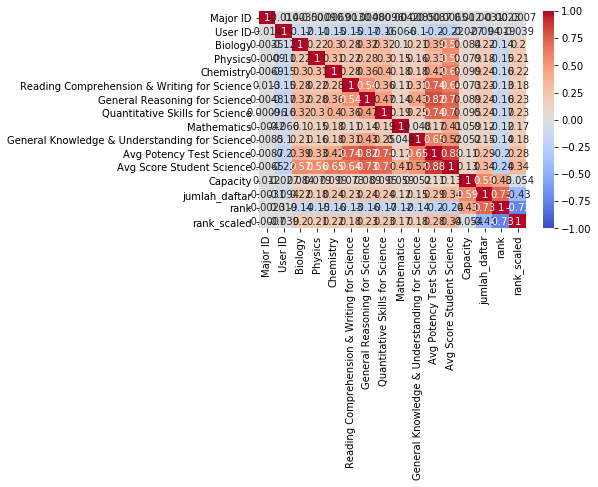

In [31]:
import seaborn as sns
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [32]:
del df["Departement"]
del df["Major Name"]
del df["University"]

In [110]:
# COBA 1
del df["rank"]

In [76]:
# del df["Capacity"]

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [35]:
X = df[['Major ID', 'Biology', 'Physics', 'Chemistry',
       'Reading Comprehension & Writing for Science',
       'General Reasoning for Science', 'Quantitative Skills for Science',
       'Mathematics', 'General Knowledge & Understanding for Science',
       'Avg Potency Test Science', 'Avg Score Student Science', 'Capacity']].values
y = df.iloc[:, -1].values

In [123]:
# df.iloc[:, :-1].columns

Index(['Major ID', 'User ID', 'Biology', 'Physics', 'Chemistry',
       'Reading Comprehension & Writing for Science',
       'General Reasoning for Science', 'Quantitative Skills for Science',
       'Mathematics', 'General Knowledge & Understanding for Science',
       'Avg Potency Test Science', 'Avg Score Student Science', 'Capacity',
       'jumlah_daftar'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 32)

### Nyoba DTRegressor

In [45]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(criterion='mse', random_state = 0, )

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [46]:
y_pred = regressor.predict(X_test)
evaluate = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1), 
                        columns=["Prediction", "Test"])
evaluate.head()

,Prediction,Test
0,98.913043,99.498328
1,22.354949,22.866894
2,46.501706,46.416382
3,47.184300,47.013652
4,99.498328,99.749164


In [47]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
# Memasukkan nilai konstanta pada model
X = sm.add_constant(X)
# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, X).fit()
# print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
# print('Model Score: ', regressor.score(np.array(X_test), y_test))
print('Model Score: ',regressor.score(X_test,y_test))

Root Mean Squared Error (RMSE):  10.014782457006769
Model Score:  0.8786606071416019


In [ ]:
# 9211352	200231	513	413	336	365	389	338	531	503	398.75	423.50	science	TEKNIK SIPIL	16	UNIVERSITAS PAPUA	9	9	

In [48]:
import pickle
with open('model_science_tree','wb') as r:
    pickle.dump(regressor,r)

In [73]:
# predicting a new value
# 'Major ID', 'User ID', 'Biology', 'Physics', 'Chemistry',
#        'Reading Comprehension & Writing for Science',
#        'General Reasoning for Science', 'Quantitative Skills for Science',
#        'Mathematics', 'General Knowledge & Understanding for Science',
#        'Avg Potency Test Science', 'Avg Score Student Science', 'Capacity',
#        'jumlah_daftar''''
# test the output by changing values
# ada nilai default, misalnya user kasi harus 
y_pred = regressor.predict([[9211352, 513, 413, 336, 365, 389, 338, 531, 503, 398, 423.50, 24]])

# print the predicted rank
print(y_pred)


[99.83277592]
